In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
class NadarayaWatson:
    def __init__(self, kernel_func, bandwidth):
        self.kernel_func = kernel_func
        self.bandwidth = bandwidth
        self.X = None
        self.Y = None

    def fit(self,X,Y):
        self.X = X
        self.Y = Y
        return self
    
    def predict(self, X_new):
        predictions = []
        for x in X_new:
            try:
                weights = self.kernel_func((x-self.X)/self.bandwidth)
                if(np.sum(weights) == 0):
                    print(weights)
                prediction = np.sum(weights*self.Y)/np.sum(weights)
                predictions.append(prediction)
            except:
                print(x, self.X,self.bandwidth)
            
        return np.array(predictions)

In [5]:
def gaussian_kernel(x):
    return np.exp(-0.5*(x**2))/np.sqrt(2*np.pi)

def epanechnikov_kernel(x):
    return np.where(np.abs(x)<=1,0.75*(1-x*x),0)

In [6]:
def risk(Y_true,Y_pred):
    return np.mean((Y_true-Y_pred)**2)

In [7]:
def k_fold_cross_validation(X,Y,kernel_func,bandwidth,k=5):
    n = len(X)
    fold_size = n//k
    indices = np.arange(n)
    np.random.shuffle(indices)

    risks = []
    for i in range(k):
        val_idx = indices[i*fold_size:(i+1)*fold_size]
        train_idx = np.concatenate([indices[:i*fold_size],indices[(i+1)*fold_size:]])
        X_train, X_val = X[train_idx], X[val_idx]
        Y_train, Y_val = Y[train_idx], Y[val_idx]

        model = NadarayaWatson(kernel_func, bandwidth)
        model.fit(X_train,Y_train)
        Y_pred = model.predict(X_val)
        risks.append(risk(Y_val,Y_pred))

    return np.mean(risks)


In [8]:
def optimal_bandwidth(X,Y,kernel_func,bandwidths):
    risks = []
    for h in bandwidths:
        risk = k_fold_cross_validation(X,Y,kernel_func,h)
        risks.append(risk)
    optimal = np.argmin(risks)
    return bandwidths[optimal], np.array(risks)

In [9]:
def plot_model(X,Y,model,plot_type):
    X_sorted_indices = np.argsort(X)
    X_sorted = X[X_sorted_indices]
    Y_pred = model.predict(X_sorted)

    plt.scatter(X,Y,label='Data points', color='red')
    plt.plot(X_sorted, Y_pred, color='red', label='Fitted curve')
    plt.legend()
    return plt.gcf()

In [10]:
df = pd.read_csv('Forensic_glass_data.csv')
df.columns

Index(['Unnamed: 0', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'type'],
      dtype='object')

Optimal value of the bandwidth is  0.33516026509388425


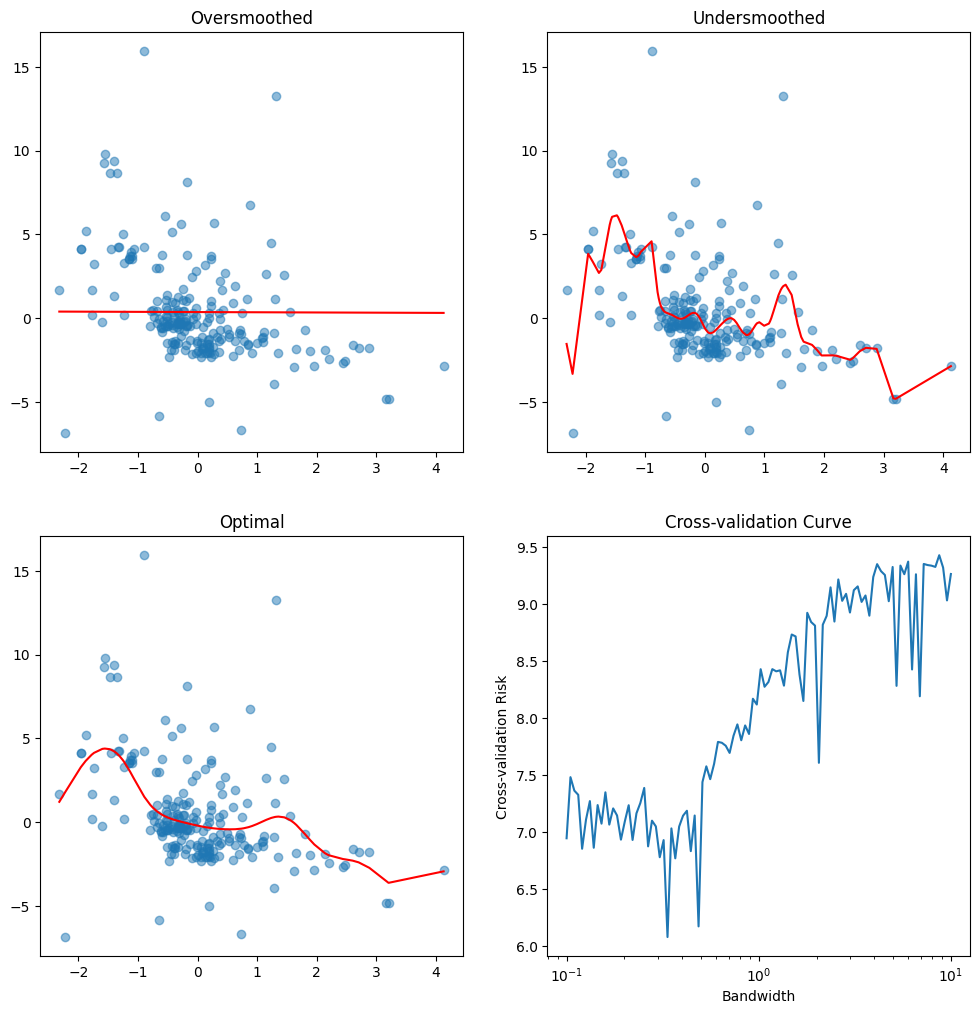

In [11]:
X = df['Al']
Y = df['RI']
model = NadarayaWatson(gaussian_kernel,3)
X = (X-np.mean(X))/np.std(X)

bandwidths = np.logspace(-1,1,100)

gaussian_optimal_h, gaussian_risks = optimal_bandwidth(X,Y,gaussian_kernel,bandwidths)
# epanechnikov_optimal_h, epanechnikov_risks = optimal_bandwidth(X,Y,epanechnikov_kernel,bandwidths)

fig, axes = plt.subplots(2,2, figsize=(12,12))

model_gaussian = NadarayaWatson(gaussian_kernel,bandwidths[-1])
model_gaussian.fit(X,Y)
X_sorted = np.sort(X)
Y_pred = model_gaussian.predict(X_sorted)
axes[0,0].scatter(X,Y,alpha=0.5)
axes[0,0].plot(X_sorted,Y_pred,'r-')
axes[0,0].set_title('Oversmoothed')

model_gaussian = NadarayaWatson(gaussian_kernel,bandwidths[0])
model_gaussian.fit(X,Y)
X_sorted = np.sort(X)
Y_pred = model_gaussian.predict(X_sorted)
axes[0,1].scatter(X,Y,alpha=0.5)
axes[0,1].plot(X_sorted,Y_pred,'r-')
axes[0,1].set_title('Undersmoothed')

model_gaussian = NadarayaWatson(gaussian_kernel,gaussian_optimal_h)
model_gaussian.fit(X,Y)
X_sorted = np.sort(X)
Y_pred = model_gaussian.predict(X_sorted)
axes[1,0].scatter(X,Y,alpha=0.5)
axes[1,0].plot(X_sorted,Y_pred,'r-')
axes[1,0].set_title('Optimal')

axes[1, 1].plot(bandwidths, gaussian_risks)
axes[1, 1].set_xscale('log')
axes[1, 1].set_xlabel('Bandwidth')
axes[1, 1].set_ylabel('Cross-validation Risk')
axes[1, 1].set_title('Cross-validation Curve')

print("Optimal value of the bandwidth is ", gaussian_optimal_h)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid val

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid val

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid val

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid val

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid val

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid val

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_41872\1365598437.py:20: RuntimeWarning: invalid value encountered in scalar divide
  prediction = np.sum(weights*self.Y)/np.sum(weights)


Optimal value of the bandwidth is  1.1768119524349985


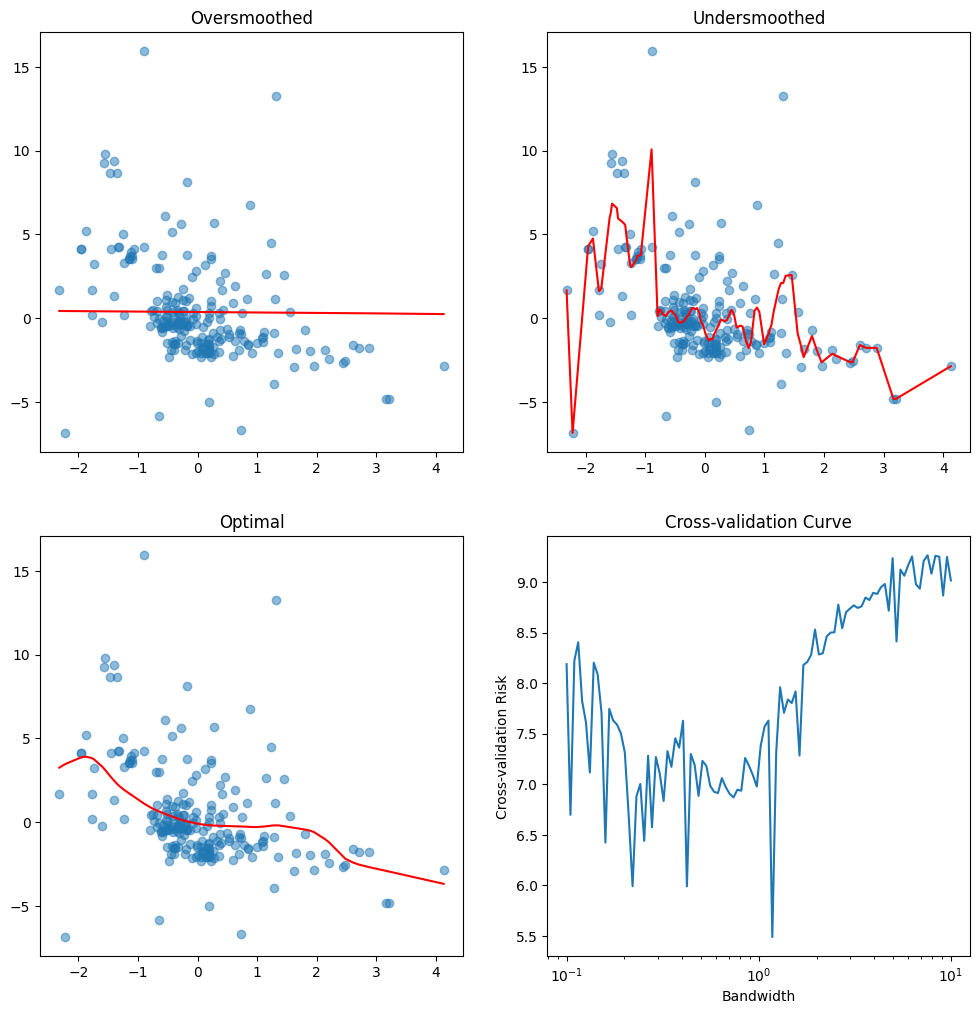

In [12]:
epanechnikov_optimal_h, epanechnikov_risks = optimal_bandwidth(X,Y,epanechnikov_kernel,bandwidths)

fig, axes = plt.subplots(2,2, figsize=(12,12))

epanechnikov_model = NadarayaWatson(epanechnikov_kernel,bandwidths[-1])
epanechnikov_model.fit(X,Y)
X_sorted = np.sort(X)
Y_pred = epanechnikov_model.predict(X_sorted)
axes[0,0].scatter(X,Y,alpha=0.5)
axes[0,0].plot(X_sorted,Y_pred,'r-')
axes[0,0].set_title('Oversmoothed')

epanechnikov_model = NadarayaWatson(epanechnikov_kernel,bandwidths[0])
epanechnikov_model.fit(X,Y)
X_sorted = np.sort(X)
Y_pred = epanechnikov_model.predict(X_sorted)
axes[0,1].scatter(X,Y,alpha=0.5)
axes[0,1].plot(X_sorted,Y_pred,'r-')
axes[0,1].set_title('Undersmoothed')

epanechnikov_model = NadarayaWatson(epanechnikov_kernel,epanechnikov_optimal_h)
epanechnikov_model.fit(X,Y)
X_sorted = np.sort(X)
Y_pred = epanechnikov_model.predict(X_sorted)
axes[1,0].scatter(X,Y,alpha=0.5)
axes[1,0].plot(X_sorted,Y_pred,'r-')
axes[1,0].set_title('Optimal')

axes[1, 1].plot(bandwidths, epanechnikov_risks)
axes[1, 1].set_xscale('log')
axes[1, 1].set_xlabel('Bandwidth')
axes[1, 1].set_ylabel('Cross-validation Risk')
axes[1, 1].set_title('Cross-validation Curve')

print("Optimal value of the bandwidth is ", epanechnikov_optimal_h)